In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors.kde import KernelDensity

%matplotlib inline

In [1]:
def p(x, a=3, b=1, x0=0.3):
    inv_a = 1./a
    d = b**inv_a
    if x <= x0:
        return (b - (d + x - x0)**a)**inv_a
    else:
        return (b - (d - x + x0)**a)**inv_a

In [139]:
def q(x, a=2, x0=0.3):
    return max(0, 1 - 1/abs(10**a * (x - x0)))

In [140]:
x = np.linspace(0,1, 10000)

In [141]:
vp = np.vectorize(p)
vq = np.vectorize(q)

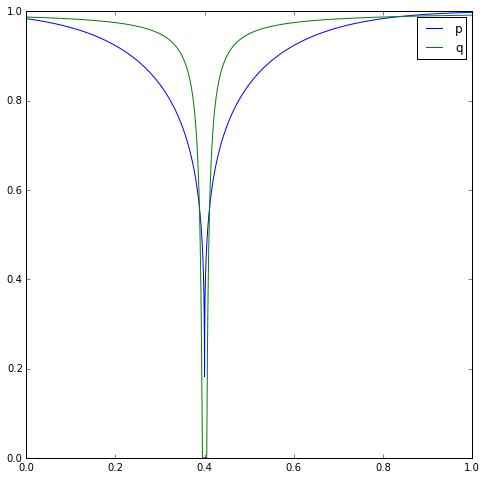

In [163]:
plt.figure(figsize=(8, 8))
plt.plot(x, vp(x, 5, 1, 0.4), label='p')
plt.plot(x, vq(x, a=2.3, x0=0.4), label='q');
plt.legend()

## Sampling


In [232]:
nb_samples = 100
a = 4
A = 1
x0 = 0.6

In [165]:
ux = np.random.sample(nb_samples)

In [166]:
uy = np.random.sample(nb_samples)

In [167]:
sampled_p = ux[uy < vp(ux, a=a, x0=x0)]
sampled_q = ux[uy < vq(ux, a=A, x0=x0)]

In [168]:
#kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(sampled_p)

In [169]:
#log_dens = kde.score_samples()

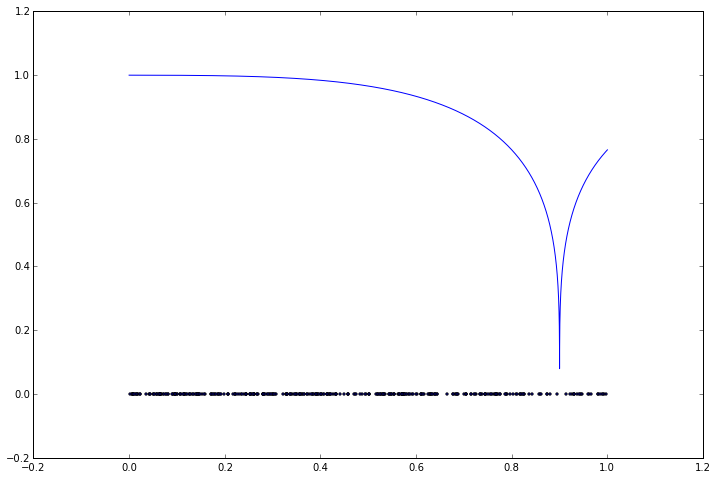

In [170]:
fig = plt.figure(figsize=(12, 8))
plt.plot(x, vp(x, a=a, x0=x0))
plt.scatter(sampled_p, np.zeros(nb_samples)[uy < vp(ux, a=a, x0=x0)], marker=".");

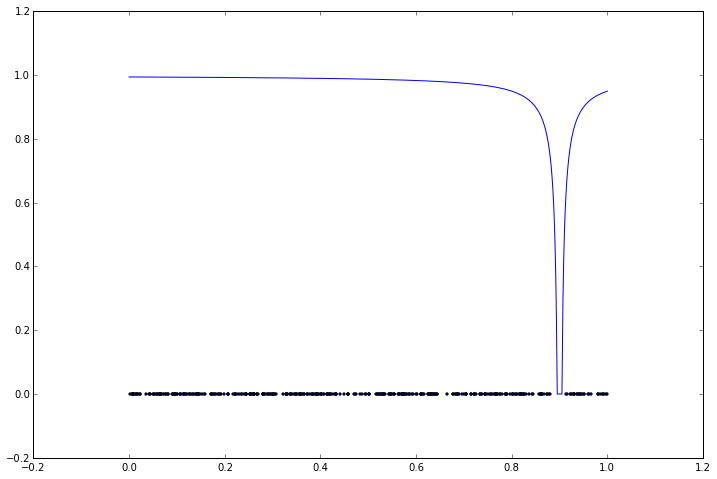

In [171]:
fig = plt.figure(figsize=(12, 8))
plt.plot(x, vq(x, a=A, x0=x0))
plt.scatter(sampled_q, np.zeros(nb_samples)[uy < vq(ux, a=A, x0=x0)], marker=".");

In [226]:
def rejection_sampling(f):
    """Assumption: f: [0, 1] -> [0, 1] 
    """
    u = np.random.sample()
    v = np.random.sample()
    if v < f(u):
        return u
    else:
        return rejection_sampling(f)

In [266]:
def normalize(v):
    """Normalize vector to [0, 1]
    """
    mini = np.min(v)
    maxi = np.max(v)
    return (v - mini) / (maxi - mini)

In [270]:
v = np.array([2, 3, 6])
normalize(v)

array([ 0.  ,  0.25,  1.  ])

In [269]:
nb_samples = 10
a = 4
A = 2.3
x0 = 0.6
x1 = 0.3

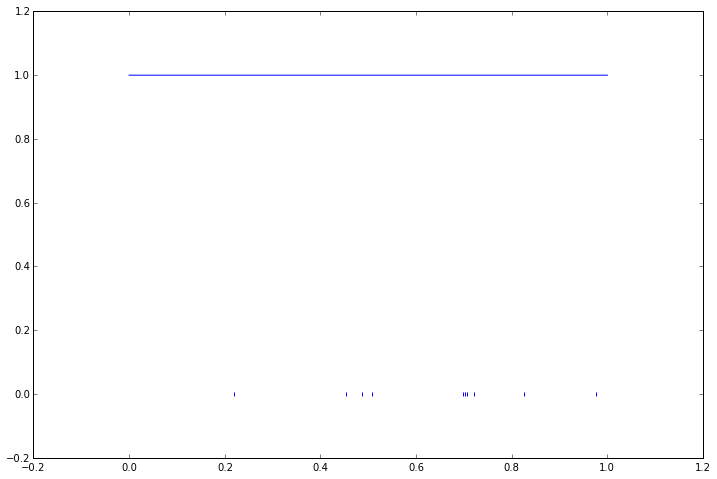

In [244]:
x = [rejection_sampling(lambda x: q(x, a=A, x0=x0)) for i in range(nb_samples)]
fig = plt.figure(figsize=(12, 8))
vx = np.linspace(0,1,10000)
plt.plot(vx, vq(vx, a=A, x0=x0))
plt.scatter(x, np.zeros(nb_samples), marker="|");

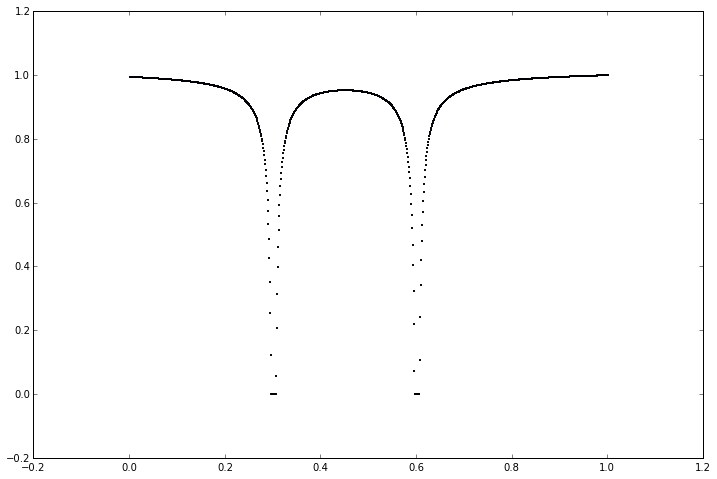

In [271]:
fig = plt.figure(figsize=(12, 8))
vx = np.linspace(0,1,1000)
comb = normalize((vq(vx, a=A, x0=x0) + vq(vx, a=A, x0=x1))/2)
plt.scatter(vx, comb, marker=',', s=1)
#plt.scatter(x, np.zeros(nb_samples), marker="|");

In [ ]:
a = 
nb_drops = 10
rain = list()
drop = np.random.sample()
rain.append(drop)
for i in range(nb_drops - 1):
    
    
    
    
